# Kaggle Project

## Describe Your Dataset

**URL:** https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data

**Task:**

Leverage this dataset to analyze and understand the preferences and behaviors of customers. The aim is to help businesses make data-informed decisions, enhance their product lineup, fine-tune marketing strategies, and improve overall customer satisfaction. By understanding patterns in this dataset, businesses can tailor their strategies to better align with customer needs and preferences

**Datasets**

* Train dataset: 2730

* Validation dataset: 780

* Test dataset: 390

**Features(x):**

['Age','Gender','Location','Payment Method','Frequency of Purchases','Discount Applied']

**Target(y):**

'Subscription Status'

---

## Build Your Model

### Data preprocessing

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [28]:
df=pd.read_csv('shopping_trends_updated.csv')

In [29]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [30]:
df.shape

(3900, 18)

In [31]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [32]:
correlation_matrix = df.corr()

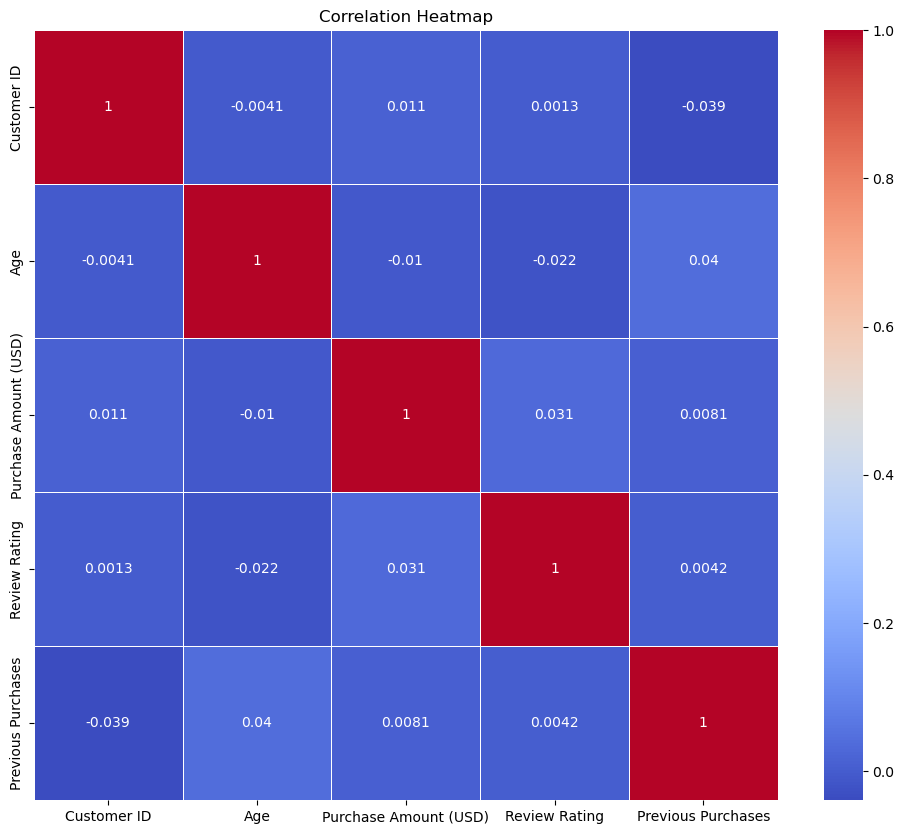

In [33]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)

plt.title("Correlation Heatmap")
plt.show()

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [36]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,1,2,1,53,16,0,7,3,3.1,1,1,1,1,14,5,3
1,2,19,1,23,1,64,18,0,12,3,3.1,1,1,1,1,2,1,3
2,3,50,1,11,1,73,20,2,12,1,3.1,1,2,1,1,23,2,6
3,4,21,1,14,2,90,38,1,12,1,3.5,1,3,1,1,49,4,6
4,5,45,1,2,1,49,36,1,21,1,2.7,1,2,1,1,31,4,0


In [37]:
X = df[['Age','Gender','Location','Payment Method','Frequency of Purchases','Discount Applied']] #Independant variables
y = df['Subscription Status']

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

print("train:", len(X_train))
print("val:", len(X_val))
print("test:", len(X_test))


train: 2730
val: 780
test: 390


### Model Construction

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

logreg = LogisticRegression()
tree = DecisionTreeClassifier()
svm = SVC()


### Train Model & Select Model

In [40]:
logreg.fit(X_train, y_train)
tree.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC()

In [41]:
def evaluate_model(model, X_val, y_val, name="Model"):
    y_pred = model.predict(X_val)
    print(f"{name} - Accuracy: {accuracy_score(y_val, y_pred):.4f}")
    print(f"{name} - F1: {f1_score(y_val, y_pred):.4f}")
    print(f"{name} - Recall: {recall_score(y_val, y_pred):.4f}")
    print(f"{name} - Precision: {precision_score(y_val, y_pred):.4f}")

In [42]:
print("Validation Results:")
evaluate_model(logreg, X_val, y_val, "Logistic Regression")
evaluate_model(tree, X_val, y_val, "Decision Tree")
evaluate_model(svm, X_val, y_val, "SVM")

Validation Results:
Logistic Regression - Accuracy: 0.8308
Logistic Regression - F1: 0.7668
Logistic Regression - Recall: 1.0000
Logistic Regression - Precision: 0.6218
Decision Tree - Accuracy: 0.8064
Decision Tree - F1: 0.6576
Decision Tree - Recall: 0.6682
Decision Tree - Precision: 0.6473
SVM - Accuracy: 0.7218
SVM - F1: 0.0000
SVM - Recall: 0.0000
SVM - Precision: 0.0000


In [43]:

from sklearn.model_selection import GridSearchCV


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

logreg = LogisticRegression()

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")



Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


---

## Performance

In [44]:
## codes

best_logreg = LogisticRegression(**grid_search.best_params_)
best_logreg.fit(X_train, y_train)

y_pred = best_logreg.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1: {f1_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")

Accuracy: 0.8282
F1: 0.7803
Recall: 1.0000
Precision: 0.6398


The results explains


- **'C': 1**: This is the inverse regularization strength. Regularization is a technique used to avoid overfitting in machine learning models. When 'C' is small, the regularization strength is strong which can lead to a more generalized model, while a larger 'C' indicates weaker regularization. In this result, 'C' is set to 1, suggesting that the optimal balance between fitting the training data and regularization was found at this value.

- **'penalty': 'l1'**: This refers to the L1 regularization, also known as Lasso regularization. L1 regularization tends to produce sparse weight vectors; some feature weights can become exactly zero. This means L1 can also be seen as a form of feature selection.

- **'solver': 'liblinear'**: The solver 'liblinear' is an optimization algorithm used to find the model parameters that minimize the cost function (in the case of logistic regression, this would be the logistic loss). 'liblinear' is particularly suitable for small datasets and works well with L1 regularization.

In summary, the best parameters suggest that the logistic regression model trained with an L1 penalty (Lasso regularization) and using the 'liblinear' solver with a regularization strength ('C') of 1 produced the best F1 score on your validation set. The choice of L1 regularization might indicate that only a subset of the features was influential in predicting the target variable, as L1 can drive some feature coefficients to zero.